In [6]:
import qiskit as q
from qiskit import *
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
#IBMQ.save_account("b124323d18db5eb6fc001390c6b008203f42df1d228338db9fcd399e492623ea4fbe4249a80bc6b6dc051aaca552ff717386c97c5ebab8c74e47ec1198b764be")
IBMQ.load_account()
%matplotlib inline
from qiskit.visualization import plot_histogram

In [7]:
import matplotlib as plt
from matplotlib import style
style.use('dark_background')

In [8]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits remaining")

ibmq_qasm_simulator has 6 queueed and simulated qubits remaining
ibmqx2 has 191 queueed and 5 qubits remaining
ibmq_16_melbourne has 372 queueed and 15 qubits remaining
ibmq_vigo has 13 queueed and 5 qubits remaining
ibmq_ourense has 24 queueed and 5 qubits remaining
ibmq_london has 3 queueed and 5 qubits remaining
ibmq_burlington has 0 queueed and 5 qubits remaining
ibmq_essex has 1 queueed and 5 qubits remaining
ibmq_armonk has 0 queueed and 1 qubits remaining


Bernstein-Vazirani Algorithm for one-shot prediction
====================================================
The algorithm has four main parts.

Initialize the first $n$ qubits in the state $\vert0\rangle$, and the last qubit in the $\vert1\rangle$ state. In Qiskit, all qubits are initialized in the $\vert0\rangle$ state, so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize it to $\vert1\rangle$ state by applying an $X$ gate.

Apply Hadamard gates to all qubits.

Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that the there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1.

Measure the first $n$ qubits in the Bell basis. This means applying Hadamard gates to the first $n$ qubits again before applying measurements.

In [89]:
# Circuit Design
def one_shot_prediction(secret_string ,n):
    bva_circuit = QuantumCircuit(n+1, n)

    bva_circuit.x(n)
    bva_circuit.h(range(n+1))

    bva_circuit.barrier()

    for ii, yesno in enumerate(reversed(secret_string)):
        if yesno == '1': 
            bva_circuit.cx(ii, n)

    bva_circuit.barrier()
    bva_circuit.h(range(n+1))
    bva_circuit.measure(range(n),range(n))
    
    return bva_circuit        

In [95]:
secret_string = '1011'
bva_circuit = one_shot_prediction(secret_string, len(secret_string))
# bva_circuit.draw()

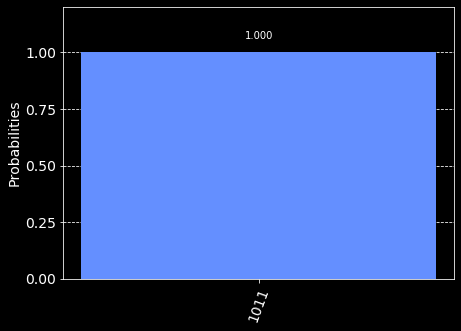

In [96]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(bva_circuit, backend=simulator, shots=1).result()
plot_histogram(result.get_counts(bva_circuit))

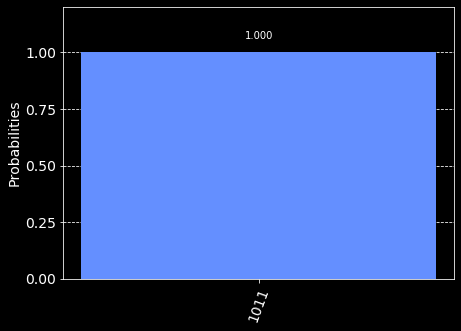

In [97]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(bva_circuit, backend=simulator, shots=1).result()
plot_histogram(result.get_counts(bva_circuit))

In [98]:
# Simualation in IBMQ

In [99]:
backend = provider.get_backend('ibmq_london')
job = q.execute(bva_circuit, backend=backend, shots=1)
job_monitor(job)

Job Status: job has successfully run


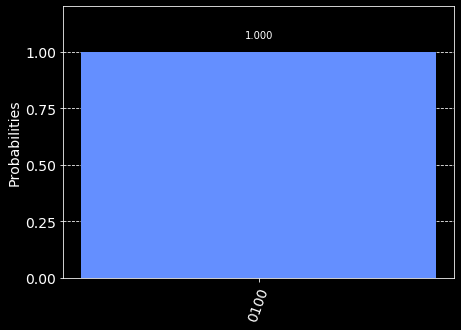

In [101]:
result = job.result()
counts = result.get_counts(bva_circuit)

plot_histogram(counts)